In [1]:
! pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [2]:
! pip install bqplot
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=c8168c6ae70b2f56e1c0992092e61cb8cf2298e6899313c0430b857d00b3442a
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [4]:
! pip install plotly

In [32]:

import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os

from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from sklearn.impute import SimpleImputer
import plotly.express as px

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
d1 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC-Airbnb-2023-data.csv',delimiter=',',header=0)

print(format(d1.shape))

(2456, 18)


In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2456 non-null   object 
 1   name                            2066 non-null   object 
 2   host_id                         2061 non-null   float64
 3   host_name                       2061 non-null   object 
 4   neighbourhood_group             2061 non-null   object 
 5   neighbourhood                   2061 non-null   object 
 6   latitude                        2061 non-null   float64
 7   longitude                       2061 non-null   float64
 8   room_type                       2061 non-null   object 
 9   price                           2061 non-null   float64
 10  minimum_nights                  2061 non-null   float64
 11  number_of_reviews               2061 non-null   float64
 12  last_review                     18

In [11]:
d1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150.0,30.0,49.0,2022-06-21,0.30,3.0,314.0,1.0,NaN
1,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.30,2.0,365.0,0.0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,2017-07-21,0.72,1.0,0.0,0.0,NaN
3,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,575.0,2023-02-19,3.41,1.0,106.0,52.0,NaN
4,"5136,""Large Sunny Brooklyn Duplex, Patio + Gar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Identificación de NaN**

In [12]:
# Calcula el porcentaje de valores nulos en cada columna
null_percentages = (d1.isnull().sum() / len(d1)) * 100

# Obtiene los tipos de datos de cada columna
types = d1.dtypes

# Nuevo DataFrame para almacenar el porcentaje de valores nulos, los nombres de las columnas y los tipos de datos
null_info = pd.DataFrame({'Column_Name': d1.columns, 'Null_Percentage': null_percentages, 'Data_Type': types})

# Filtra las columnas con un porcentaje de valores nulos mayor que un umbral específico
threshold = 0.01
filtered_columns = null_info[null_info['Null_Percentage'] > threshold]

# Ordena el resultado en orden descendente según el porcentaje de valores nulos
sorted = filtered_columns.sort_values(by='Null_Percentage', ascending=False)

print(sorted)

                                                   Column_Name  \
license                                                license   
reviews_per_month                            reviews_per_month   
last_review                                        last_review   
minimum_nights                                  minimum_nights   
number_of_reviews_ltm                    number_of_reviews_ltm   
availability_365                              availability_365   
calculated_host_listings_count  calculated_host_listings_count   
number_of_reviews                            number_of_reviews   
price                                                    price   
host_id                                                host_id   
room_type                                            room_type   
longitude                                            longitude   
latitude                                              latitude   
neighbourhood                                    neighbourhood   
neighbourh

**Columnas con mas de 20% de NaN**

In [14]:
columns_to_drop = ["license", "reviews_per_month", "last_review"]
d1.drop(columns=columns_to_drop, inplace=True)

**Columnas numéricas**

In [15]:
description = d1[["minimum_nights", "number_of_reviews_ltm", "availability_365",'calculated_host_listings_count', 'number_of_reviews','price', 'host_id','longitude','latitude']].describe()
print(description)

       minimum_nights  number_of_reviews_ltm  availability_365  \
count     2061.000000            2061.000000       2061.000000   
mean        24.573508               5.852014        118.527899   
std         30.290824              12.184820        136.856674   
min          1.000000               0.000000          0.000000   
25%          5.000000               0.000000          0.000000   
50%         30.000000               0.000000         47.000000   
75%         30.000000               4.000000        239.000000   
max        370.000000             107.000000        365.000000   

       availability_365  calculated_host_listings_count  number_of_reviews  \
count       2061.000000                     2061.000000        2061.000000   
mean         118.527899                        2.707909          67.557011   
std          136.856674                        7.935791          96.457362   
min            0.000000                        1.000000           0.000000   
25%            

In [24]:
# Filtrar las columnas que queremos rellenar con la media
mean = d1[["minimum_nights", "number_of_reviews_ltm", "availability_365",'calculated_host_listings_count', 'number_of_reviews','price', 'host_id','longitude','latitude']].mean()

# Rellenar con las respectivas medias
for column in ["minimum_nights", "number_of_reviews_ltm", "availability_365",'calculated_host_listings_count', 'number_of_reviews','price', 'host_id','longitude','latitude']:
    d1[column].fillna(mean[column], inplace=True)

**Columnas Categoricas**

In [25]:
# Calcula el porcentaje de valores nulos en cada columna
null_percentages = (d1.isnull().sum() / len(d1)) * 100

# Obtiene los tipos de datos de cada columna
types = d1.dtypes

# Nuevo DataFrame para almacenar el porcentaje de valores nulos, los nombres de las columnas y los tipos de datos
null_info = pd.DataFrame({'Column_Name': d1.columns, 'Null_Percentage': null_percentages, 'Data_Type': types})

# Filtra las columnas con un porcentaje de valores nulos mayor que un umbral específico
threshold = 0.01
filtered_columns = null_info[null_info['Null_Percentage'] > threshold]

# Ordena el resultado en orden descendente según el porcentaje de valores nulos
sorted = filtered_columns.sort_values(by='Null_Percentage', ascending=False)

print(sorted)

                             Column_Name  Null_Percentage Data_Type
host_name                      host_name        16.083062    object
neighbourhood_group  neighbourhood_group        16.083062    object
neighbourhood              neighbourhood        16.083062    object
room_type                      room_type        16.083062    object
name                                name        15.879479    object


In [27]:
#Filtrar las columnas que queremos rellenar con la moda
modes = d1[["host_name", "neighbourhood_group", "neighbourhood", "room_type", "name"]].mode()

#Rellenar con las respectivas modas
for column1 in ["host_name", "neighbourhood_group", "neighbourhood", "room_type", "name"]:
    d1[column1].fillna(modes[column1][0], inplace=True)

In [28]:
# Calcula el porcentaje de valores nulos en cada columna
null_percentages = (d1.isnull().sum() / len(d1)) * 100

# Obtiene los tipos de datos de cada columna
types = d1.dtypes

# Nuevo DataFrame para almacenar el porcentaje de valores nulos, los nombres de las columnas y los tipos de datos
null_info = pd.DataFrame({'Column_Name': d1.columns, 'Null_Percentage': null_percentages, 'Data_Type': types})

# Filtra las columnas con un porcentaje de valores nulos mayor que un umbral específico
threshold = 0.01
filtered_columns = null_info[null_info['Null_Percentage'] > threshold]

# Ordena el resultado en orden descendente según el porcentaje de valores nulos
sorted = filtered_columns.sort_values(by='Null_Percentage', ascending=False)

print(sorted)

Empty DataFrame
Columns: [Column_Name, Null_Percentage, Data_Type]
Index: []


 **Estructura del dataset luego de limpiar la gran mayoria de sus datos, con el objetivo de obtener datos ordenados.**

In [29]:
d1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2.845000e+03,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150.000000,30.000000,49.000000,3.000000,314.000000,1.000000
1,5121,BlissArtsSpace!,7.356000e+03,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60.000000,30.000000,50.000000,2.000000,365.000000,0.000000
2,5203,Cozy Clean Guest Room - Family Apt,7.490000e+03,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75.000000,2.000000,118.000000,1.000000,0.000000,0.000000
3,5178,Large Furnished Room Near B'way,8.967000e+03,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68.000000,2.000000,575.000000,1.000000,106.000000,52.000000
4,"5136,""Large Sunny Brooklyn Duplex, Patio + Gar...",Loft Suite,5.924846e+06,The Box House Hotel,Manhattan,Williamsburg,40.729836,-73.959123,Entire home/apt,195.419214,24.573508,67.557011,2.707909,118.527899,5.852014


In [33]:
#Gráfico de histograma y gráfico de boxplot
fig = px.histogram(d1, x='price', title='Histograma de Datos - Precios')

# Ajusta el tamaño del gráfico
fig.update_layout(
    autosize=False,
    width=600,
    height=400
)

fig.show()

In [35]:
#Boxplot de saleprice

fig = px.box(d1, y='price', title='Boxplot de Precios')

# Ajusta el tamaño del gráfico
fig.update_layout(
    autosize=False,
    width=400,
    height=800
)
# Mostrar el gráfico
fig.show()

### **Análisis Bivariado /Multivariado**

<ipython-input-37-bc0ce464b637>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



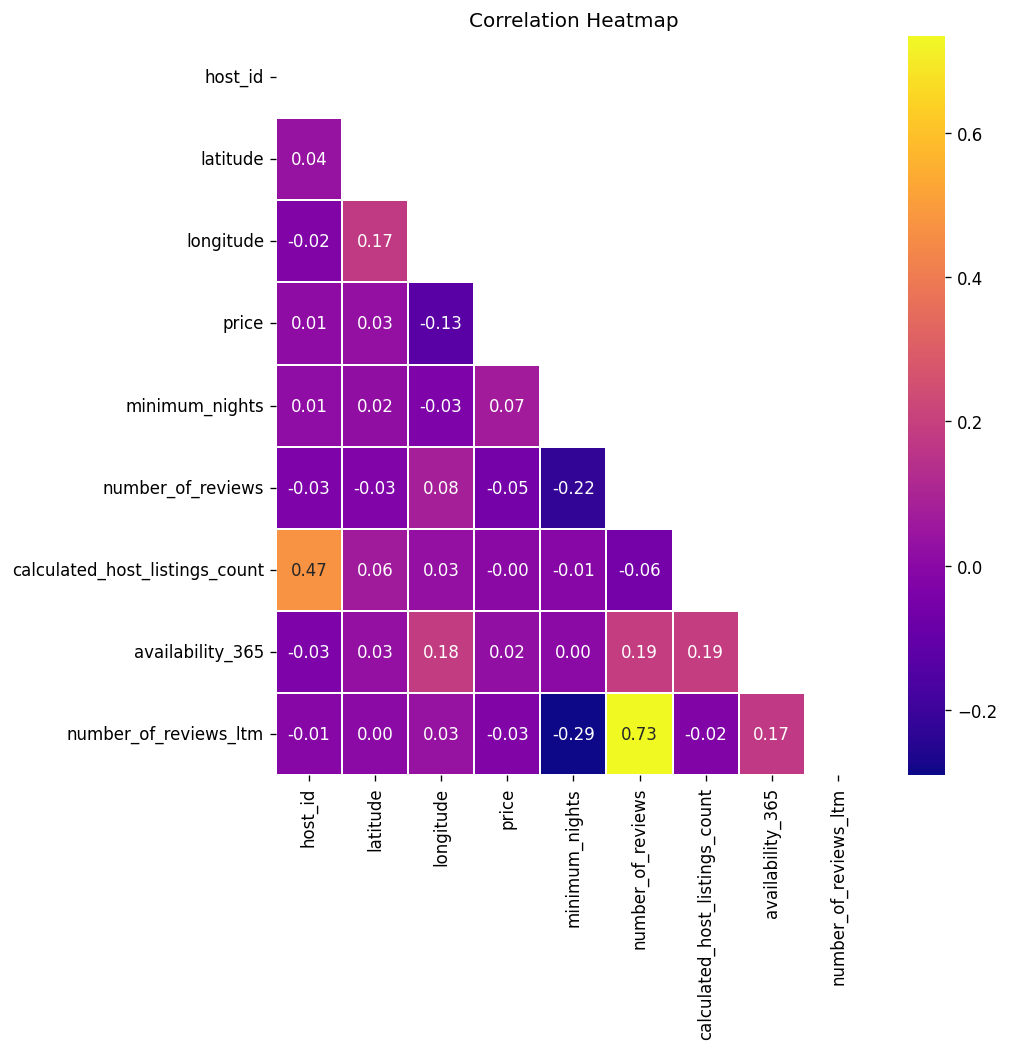

In [37]:
#Correlaciones entre variables con heatmap
plt.figure(dpi = 120,figsize= (8,8))
#Establecemos la máscara
mask = np.triu(np.ones_like(d1.corr(),dtype = bool))
#Heatmap
sns.heatmap(d1.corr(numeric_only=True), mask=mask, fmt=".2f", annot=True, lw=1, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

**Debido a la poca correlacion de las variables numéricas se deben transformar las variables categóricas para aplicar con el aprendizaje automatico y poder tener mayores correlaciones**

In [41]:
from sklearn.preprocessing import LabelEncoder

#Columnas a codificar
columnas_a_cod = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Crea una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Itera a través de las columnas y aplica Label Encoding
for columna in columnas_a_cod:
    d1[columna] = label_encoder.fit_transform(d1[columna])


In [42]:
#Filtra columnas de tipo object
columnas_object = d1.select_dtypes(include=['object'])
columnas_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2456 non-null   object
 1   name       2456 non-null   object
 2   host_name  2456 non-null   object
dtypes: object(3)
memory usage: 57.7+ KB


In [43]:
#Getdummies a las columnas nominales
columnas_object = d1.select_dtypes(include=['object'])

#Aplicar get dummies a columnas tipo object restantes
d1 = pd.get_dummies(d1, columns=columnas_object.columns)

In [44]:
columnas_object = d1.select_dtypes(include=['object'])
columnas_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Empty DataFrame


**Feature Selection**

In [48]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd

X = d1.drop(columns=['price']) #Variables independientes
y = d1['price'] #Variable objetivo

# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features= 11,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(X, y)

# Obtiene los nombres de las características seleccionadas
selected_features_stepwise = sfs_stepwise.k_feature_names_

print("Bi-directional Elimination (Stepwise) - Seleccion:", selected_features_stepwise)

Bi-directional Elimination (Stepwise) - Seleccion: ('latitude', 'longitude', 'room_type', 'availability_365', 'id_2110145', 'id_2150727', 'id_2271504', 'id_2274084', 'id_2281142', 'host_name_Henry', 'host_name_Izi')


In [49]:
import statsmodels.formula.api as smf

model1 = 'price ~ latitude + longitude + room_type + availability_365 + id_2110145 + id_2150727 + id_2271504 + id_2274084 + id_2281142 + host_name_Henry + host_name_Izi'
lm1 = smf.ols(formula=model1, data=d1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:40:54   Log-Likelihood:                -16671.
No. Observations:                2456   AIC:                         3.337e+04
Df Residuals:                    2444   BIC:                         3.344e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -8.06e+04   1.15e+04  

**Predicciones**

In [52]:
#PREDICCIONES
import statsmodels.formula.api as smf

# Define el modelo de regresión con SalePrice como variable objetivo
model1 = 'price ~ latitude + longitude + room_type + availability_365 + id_2110145 + id_2150727 + id_2271504 + id_2274084 + id_2281142 + host_name_Henry + host_name_Izi'
lm1 = smf.ols(formula=model1, data=d1).fit()

# Selecciona las columnas relevantes de d1 para crear X_test de variables independientes
X_test = d1[['latitude', 'longitude', 'room_type', 'availability_365', 'id_2110145', 'id_2150727', 'id_2271504', 'id_2274084','id_2281142','host_name_Henry','host_name_Izi']]

# Realiza predicciones utilizando el modelo lm1
d1['Predicted_price'] = lm1.predict(X_test)

In [53]:
d1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,...,host_name_Zack,host_name_Zaire,host_name_Zed,host_name_Zeynep,host_name_Ziporah,host_name_Zora & Chris,host_name_Zuben,host_name_Zuffina,host_name_Zulu & Andy,Predicted_price
0,2.845000e+03,2,74,40.753560,-73.985590,0,150.000000,30.000000,49.000000,3.000000,...,0,0,0,0,0,0,0,0,0,262.681044
1,7.356000e+03,1,7,40.685350,-73.955120,2,60.000000,30.000000,50.000000,2.000000,...,0,0,0,0,0,0,0,0,0,129.866046
2,7.490000e+03,2,110,40.803800,-73.967510,2,75.000000,2.000000,118.000000,1.000000,...,0,0,0,0,0,0,0,0,0,138.627785
3,8.967000e+03,2,74,40.764570,-73.983170,2,68.000000,2.000000,575.000000,1.000000,...,0,0,0,0,0,0,0,0,0,152.939172
4,5.924846e+06,2,116,40.729836,-73.959123,0,195.419214,24.573508,67.557011,2.707909,...,0,0,0,0,0,0,0,0,0,212.518630


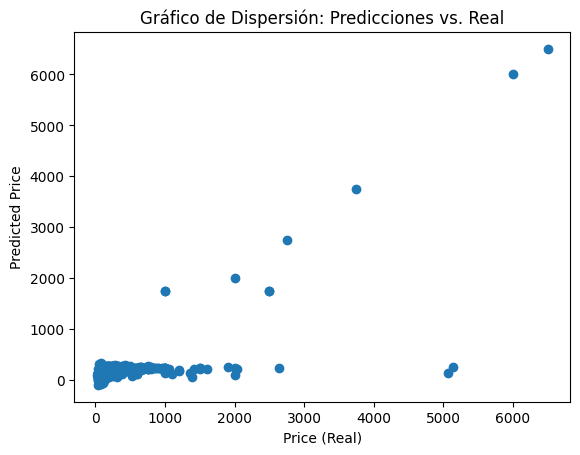

In [54]:
#Gráfico de dispersión precio real VS precio predicciones
import matplotlib.pyplot as plt

plt.scatter(d1['price'], d1['Predicted_price'])
plt.xlabel('Price (Real)')
plt.ylabel('Predicted Price')
plt.title('Gráfico de Dispersión: Predicciones vs. Real')
plt.show()

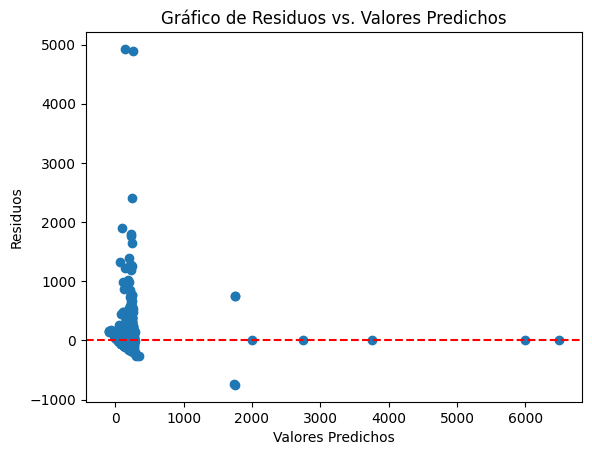

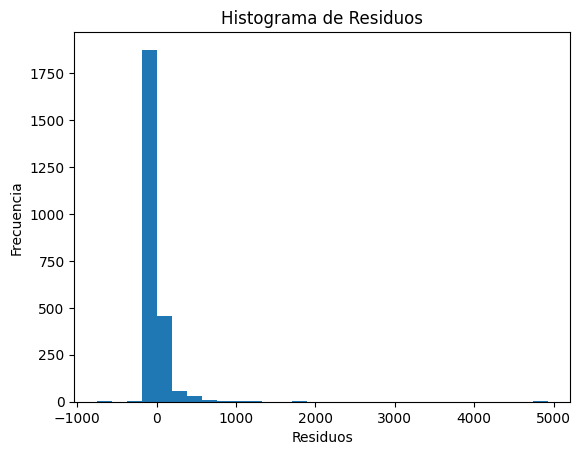

In [58]:
# Análisis de residuos
residuos = d1['price'] - d1['Predicted_price']

# Gráfico de residuos frente a los valores predichos
plt.scatter(d1['Predicted_price'], residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

# Histograma de residuos
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

**Se puede notar una elevada cantidad de residuos que demuestran las diferencias de los valores reales y predichos. Las razones pueden deberse a la posibilidad de existencia de valores atipicos que no fueron considerados ó caracterísicas ausentes del dataset que permitan ajustar valores relevantes a la variable objetivo, en este caso siendo el precio.**